In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

15
15
0
2022-06-22T00:00
     latitude  longitude  altitude       hourly.time  hourly.temperature_2m  \
0   40.105446  -7.563019     472.0  2022-06-22T00:00                   13.1   
1   40.105446  -7.563019     472.0  2022-06-22T01:00                   13.3   
2   40.105446  -7.563019     472.0  2022-06-22T02:00                   13.5   
3   40.105446  -7.563019     472.0  2022-06-22T03:00                   13.4   
4   40.105446  -7.563019     472.0  2022-06-22T04:00                   13.6   
5   40.105446  -7.563019     472.0  2022-06-22T05:00                   14.1   
6   40.105446  -7.563019     472.0  2022-06-22T06:00                   14.3   
7   40.105446  -7.563019     472.0  2022-06-22T07:00                   14.9   
8   40.105446  -7.563019     472.0  2022-06-22T08:00                   15.9   
9   40.105446  -7.563019     472.0  2022-06-22T09:00                   17.3   
10  40.105446  -7.563019     472.0  2022-06-22T10:00                   16.3   
11  40.105446  -7.563019   

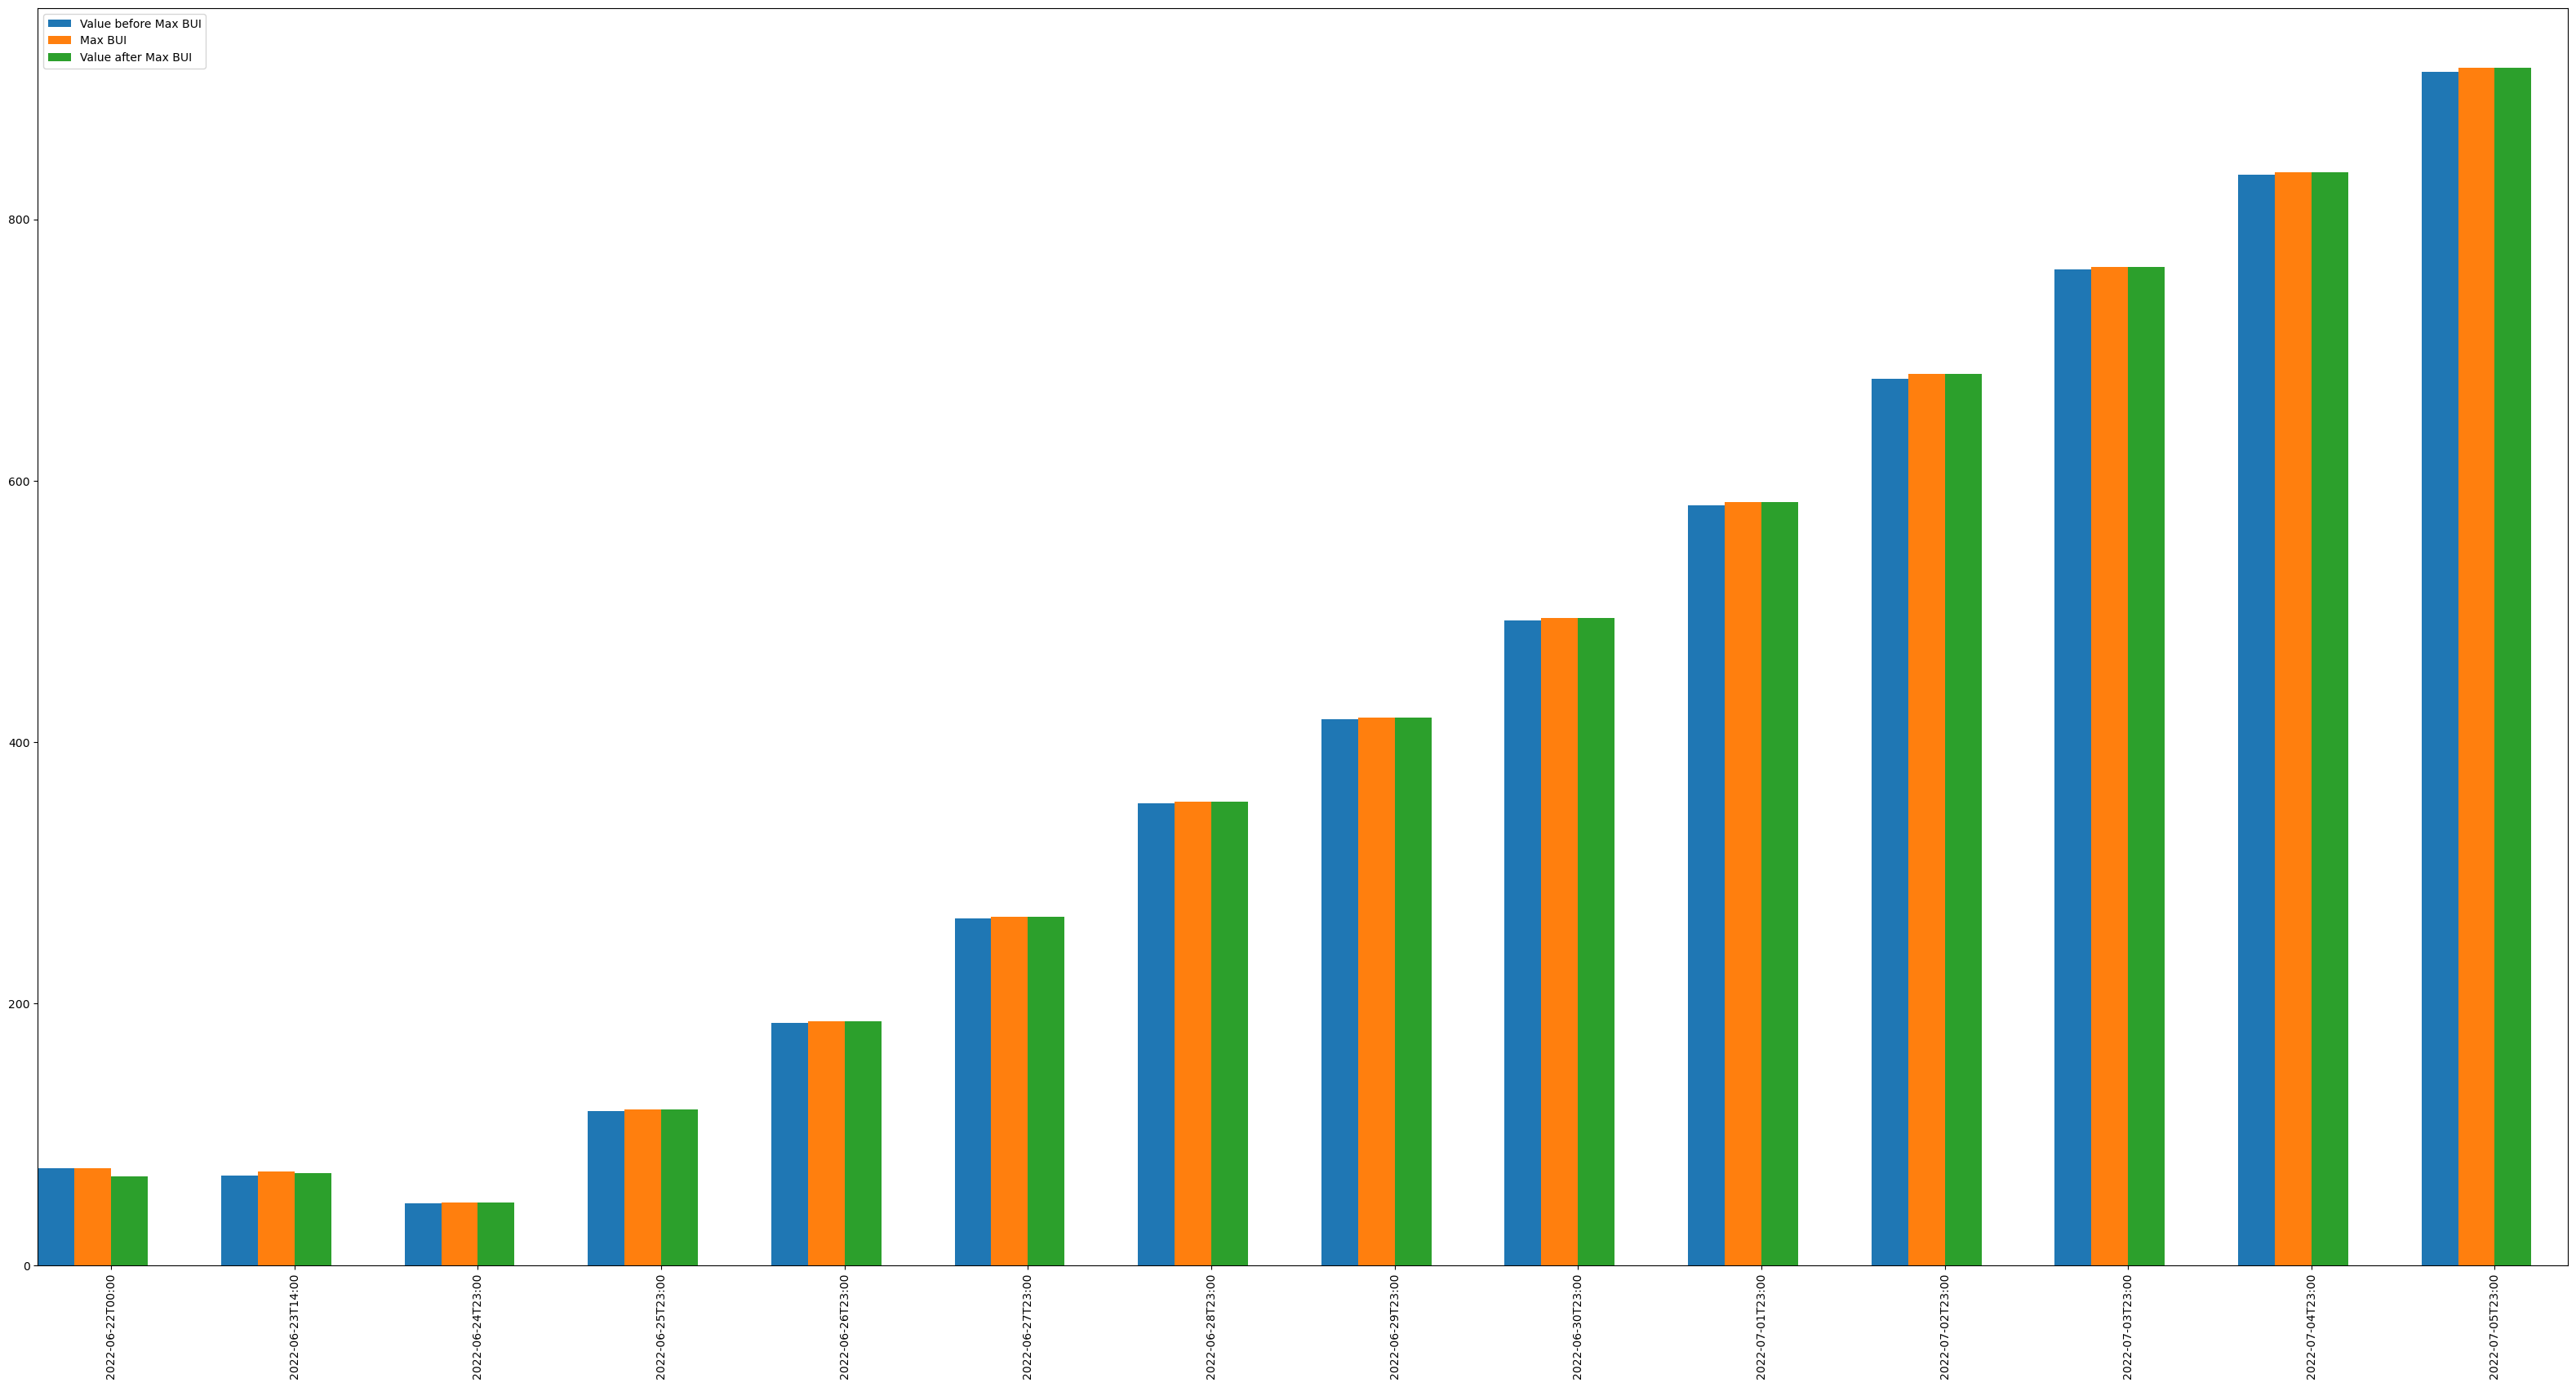

In [26]:
pdtotal = pd.read_csv('Samples/2022/2022byHourFWIXFFMCFireHour.csv')


#fwix,ffmc,dmc,dc,isi,bui

var = "BUI"
var_field = "bui"

chunk_size = 24
num_chunks = len(pdtotal) // chunk_size + 1
print(num_chunks)

bar_width = 0.25
index = np.arange(num_chunks)

max_times = []
max_fwix = []
before_fwixs = []
after_fwixs = []

print(num_chunks)

for i in range(num_chunks):
    chunk = pdtotal[i*chunk_size:(i+1)*chunk_size]
    if chunk.empty:
        continue
    
    max_index = chunk[f'{var_field}'].idxmax()
    max_time = chunk.loc[max_index, 'hourly.time']
    max_fwi = chunk.loc[max_index, f'{var_field}']
    max_times.append(max_time)
    max_fwix.append(max_fwi)

    if max_index-1 in chunk.index:
        before_time = chunk.loc[max_index-1, 'hourly.time']
        before_fwix = chunk.loc[max_index-1, f'{var_field}']
        before_fwixs.append(before_fwix)
    else:
        print(max_index)
        print(max_time)
        print(chunk)
        before_time = chunk.loc[max_index, 'hourly.time']
        before_fwix = chunk.loc[max_index, f'{var_field}']
        before_fwixs.append(before_fwix)
        #before_fwixs.append(None)

    if max_index+1 in chunk.index:
        after_time = chunk.loc[max_index+1, 'hourly.time']
        after_fwix = chunk.loc[max_index+1, f'{var_field}']
        after_fwixs.append(after_fwix)
    else:
        after_time = chunk.loc[max_index, 'hourly.time']
        after_fwix = chunk.loc[max_index, f'{var_field}']
        after_fwixs.append(after_fwix)
        #after_fwixs.append(None)

num_groups = len(max_fwix)

bar_width = 0.2

group_positions = np.arange(num_groups)

plt.figure(figsize=(40,20))


plt.bar(group_positions - 1.5*bar_width, before_fwixs, bar_width, label=f'Value before Max {var}')
plt.bar(group_positions - 0.5*bar_width, max_fwix, bar_width, label=f'Max {var}')
plt.bar(group_positions + 0.5*bar_width, after_fwixs, bar_width, label=f'Value after Max {var}')

plt.xticks(group_positions, labels=max_times, rotation=90)
plt.xlim(group_positions[0] - 2*bar_width, group_positions[-1] + 2*bar_width)

plt.savefig(f'{var}_max_before_after.png', dpi=300, bbox_inches='tight')

plt.legend()

plt.show()

68
68


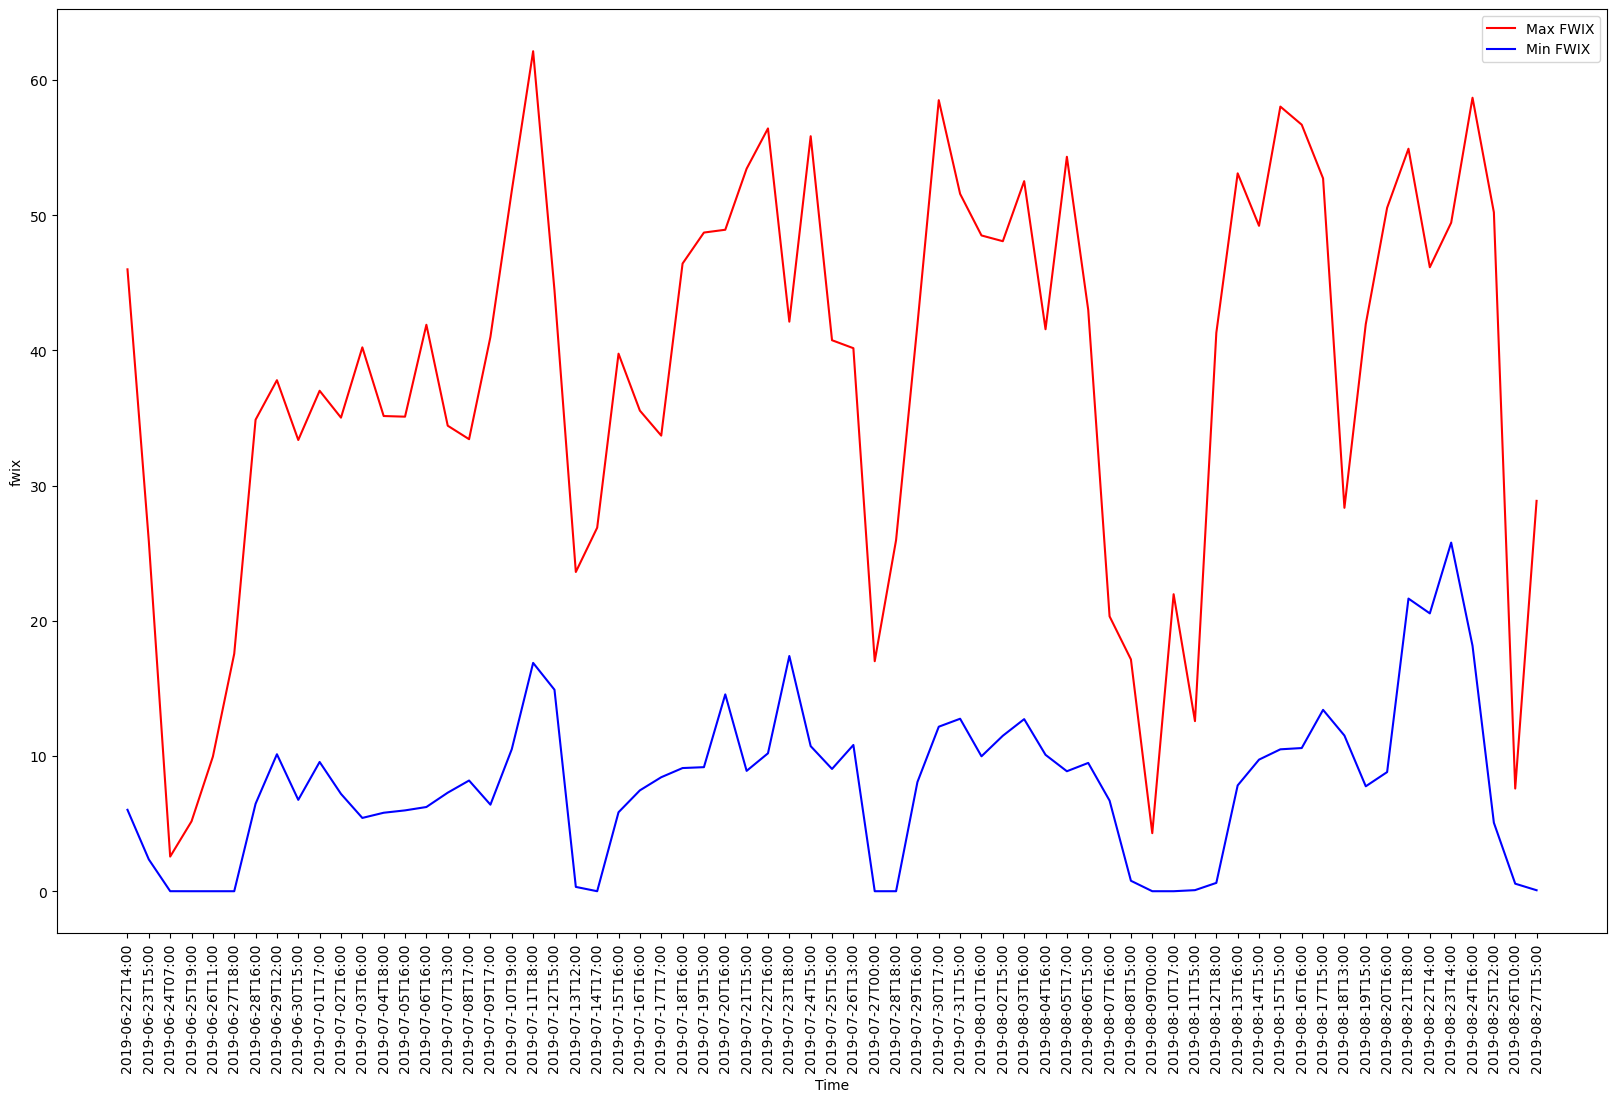

68
68


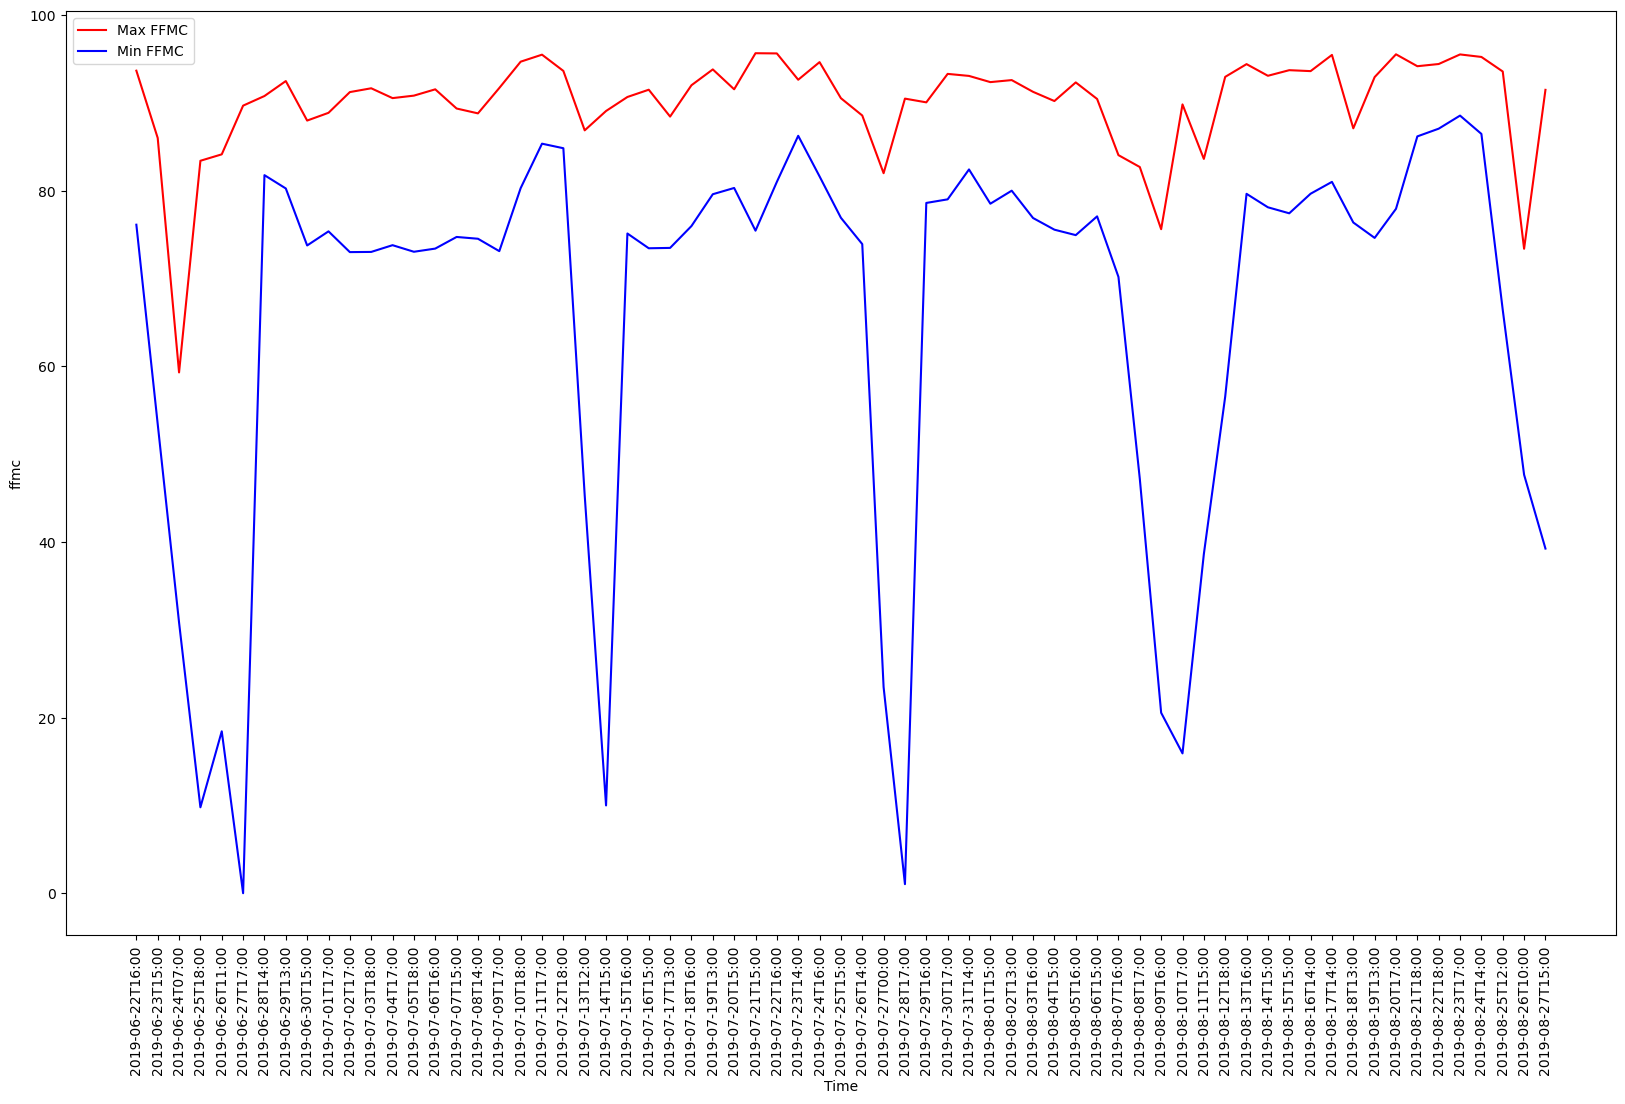

68
68


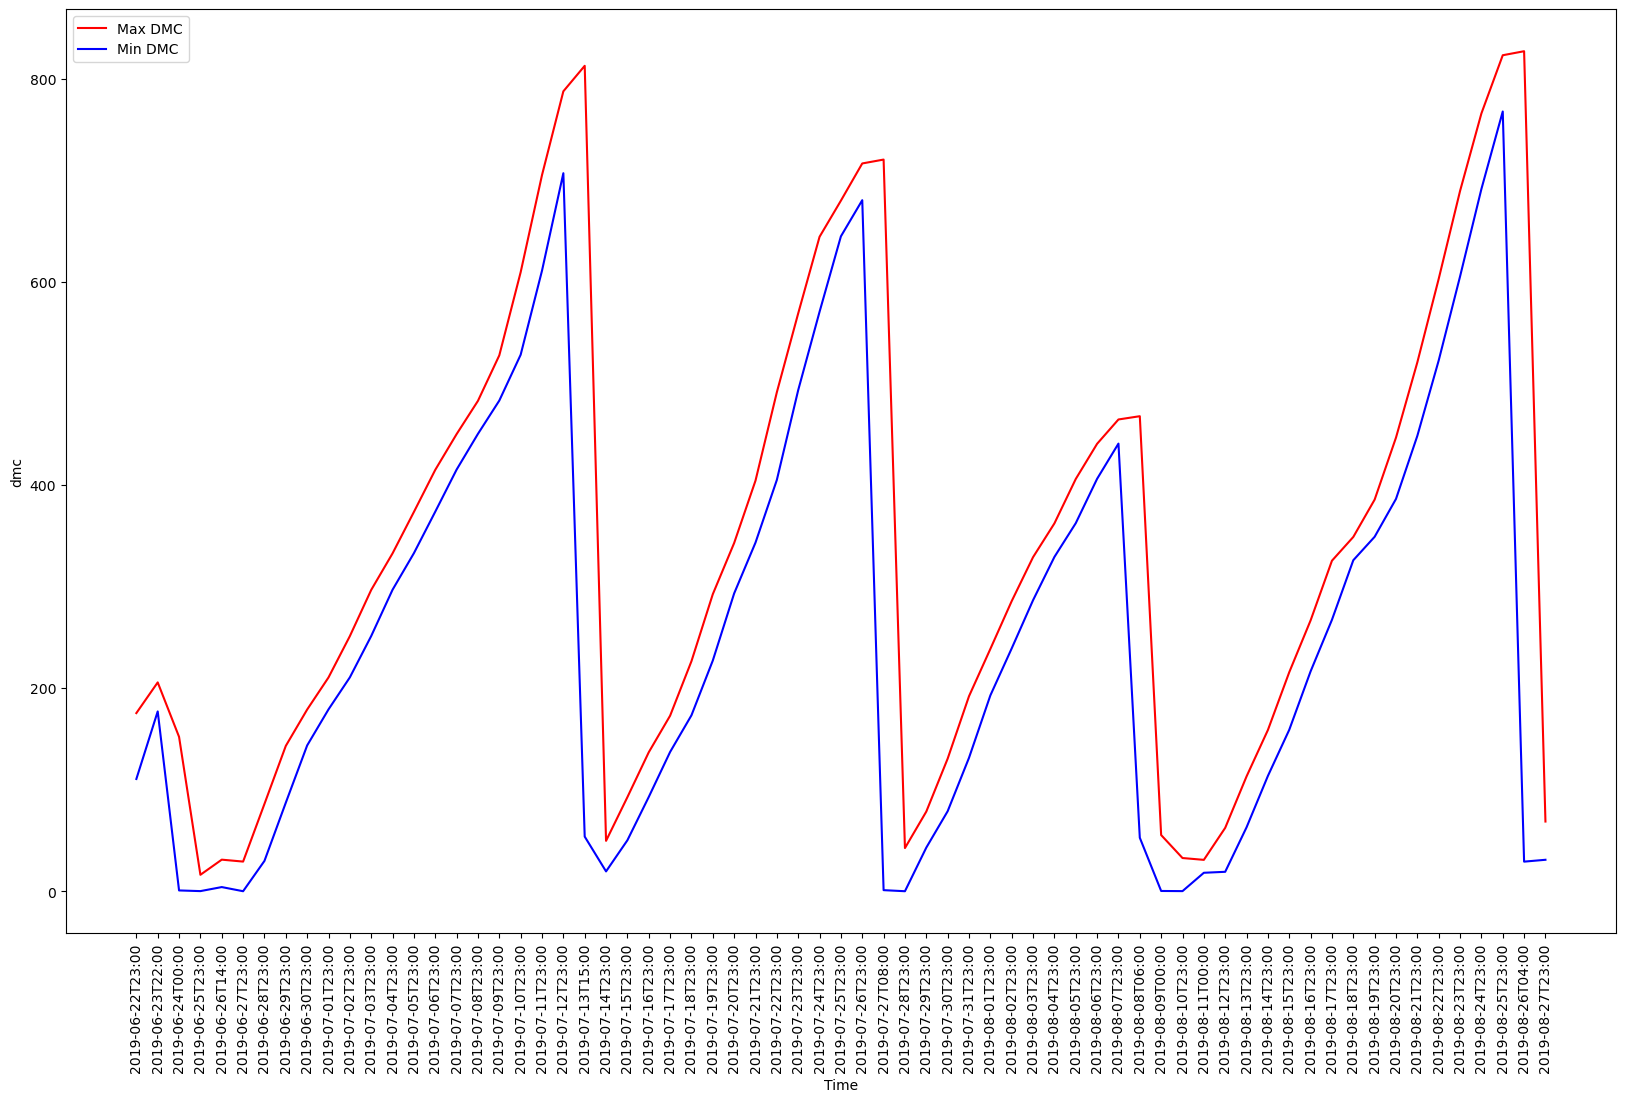

68
68


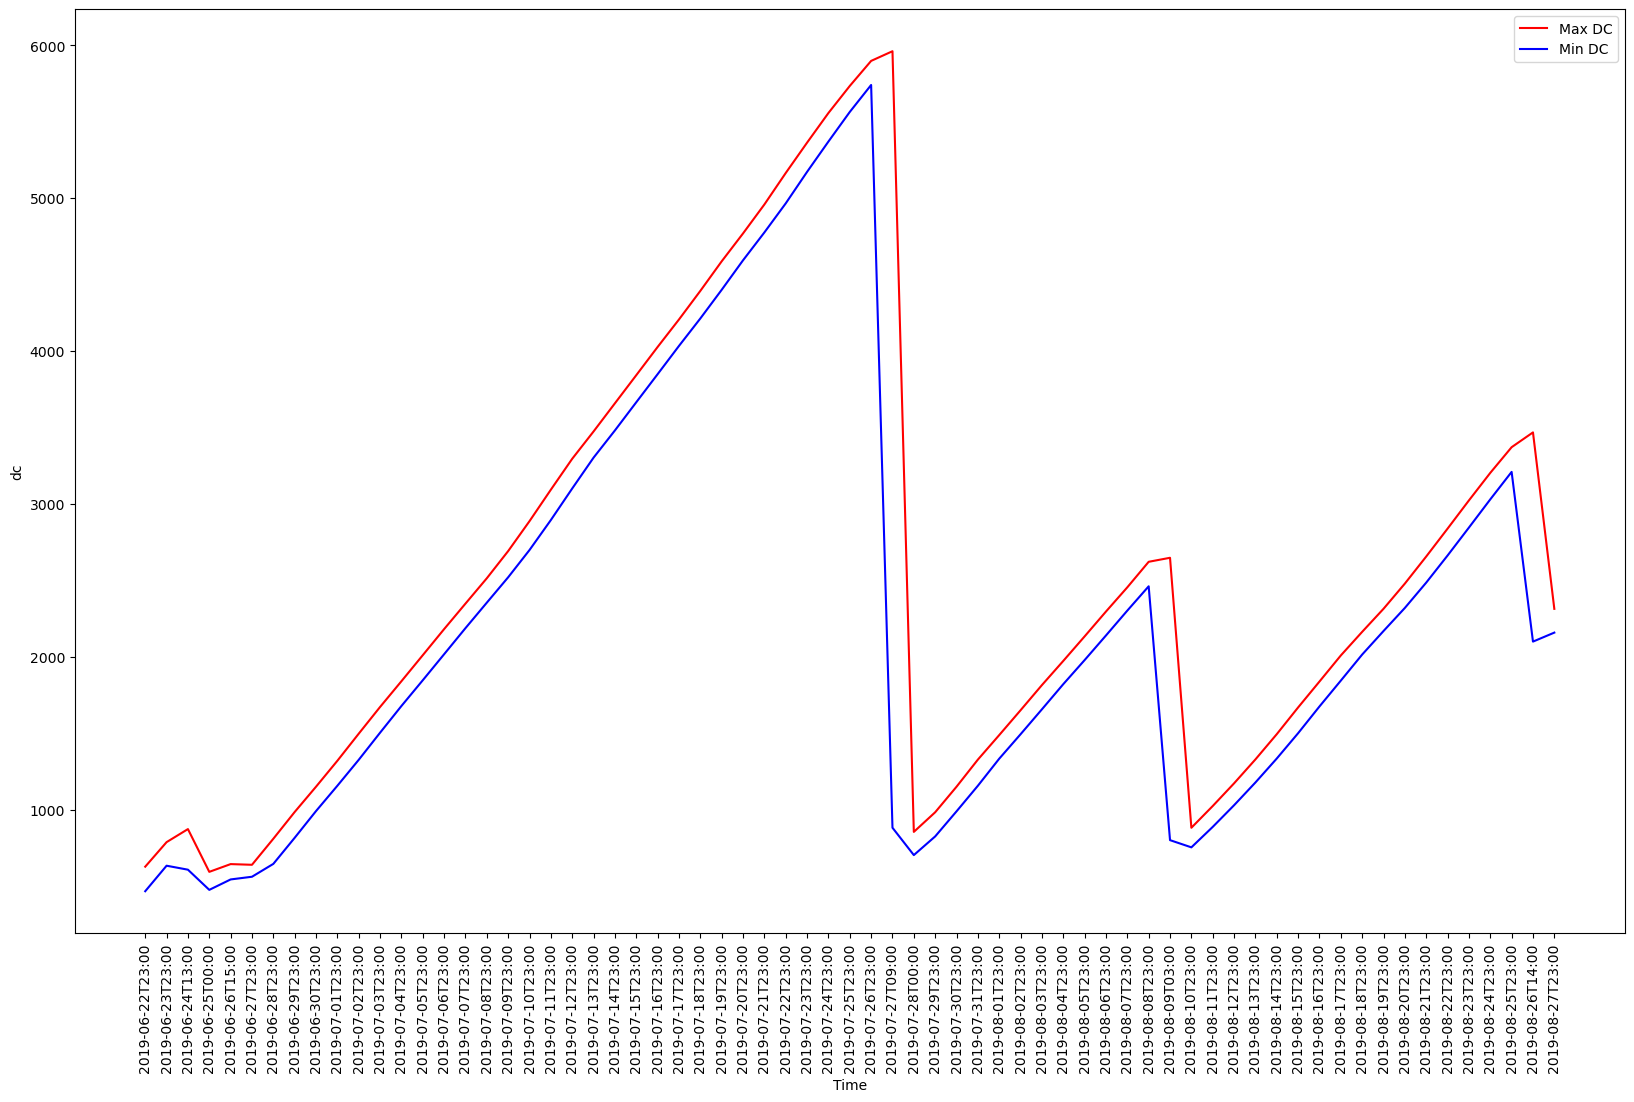

68
68


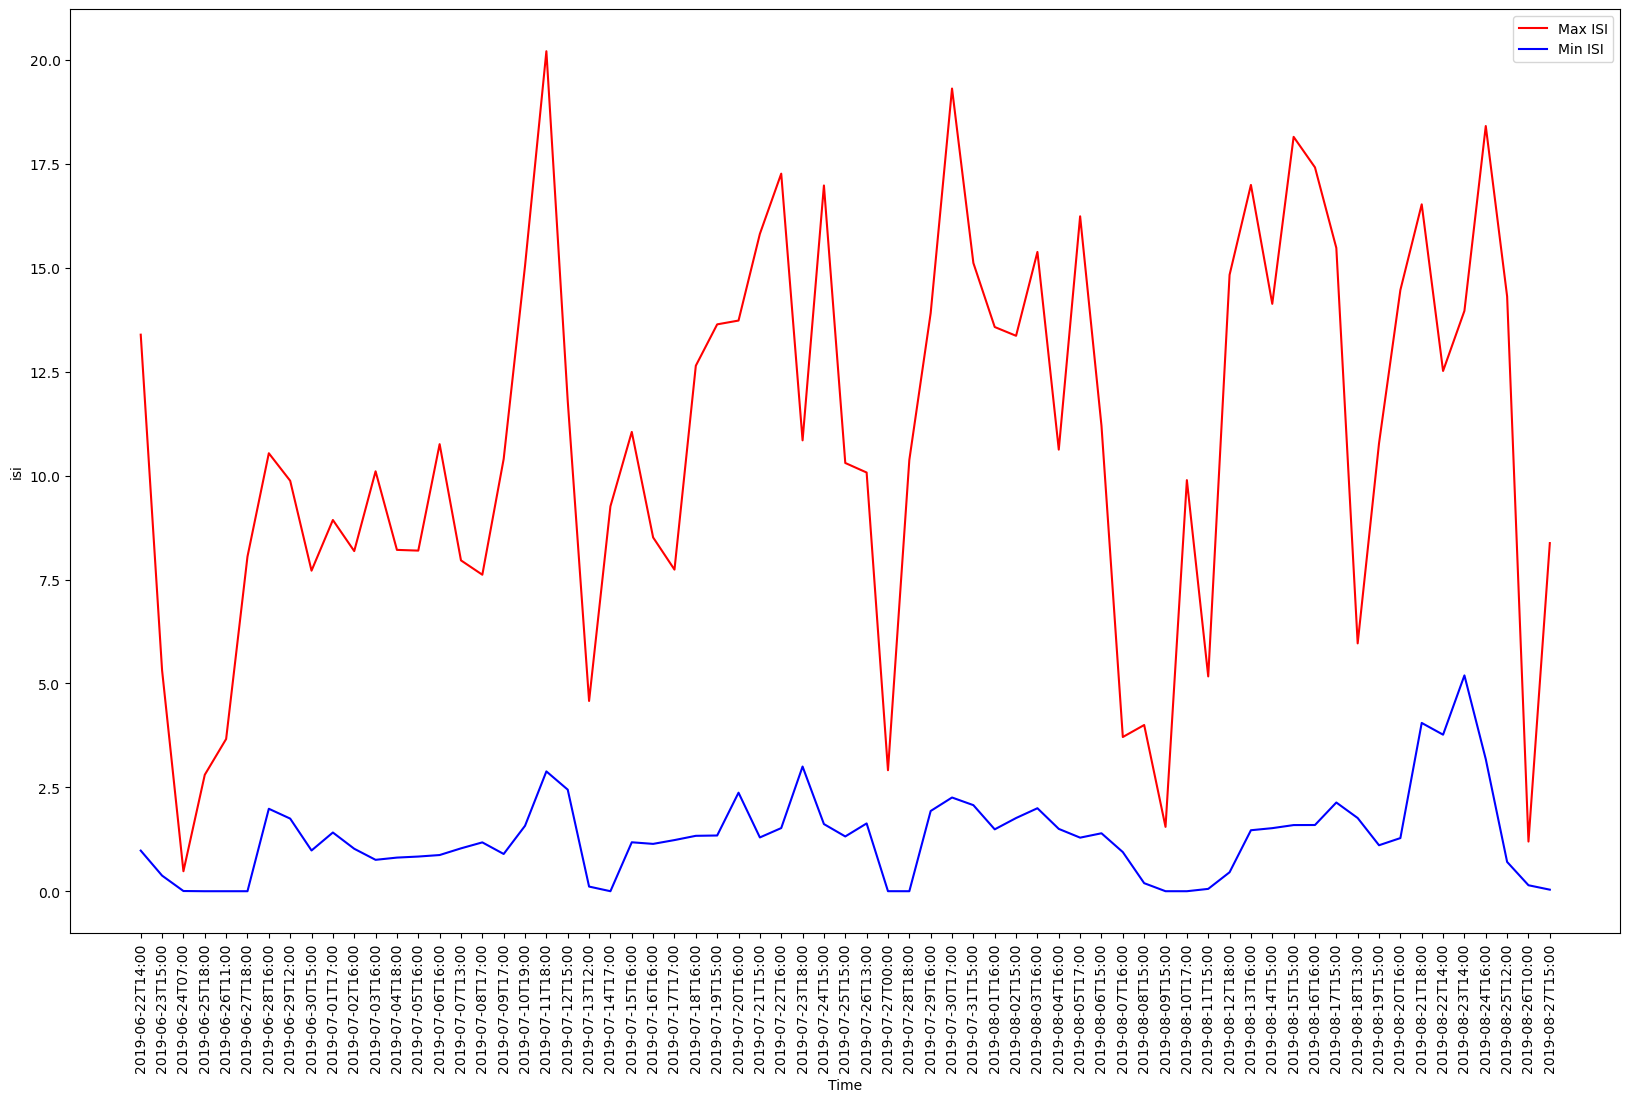

68
68


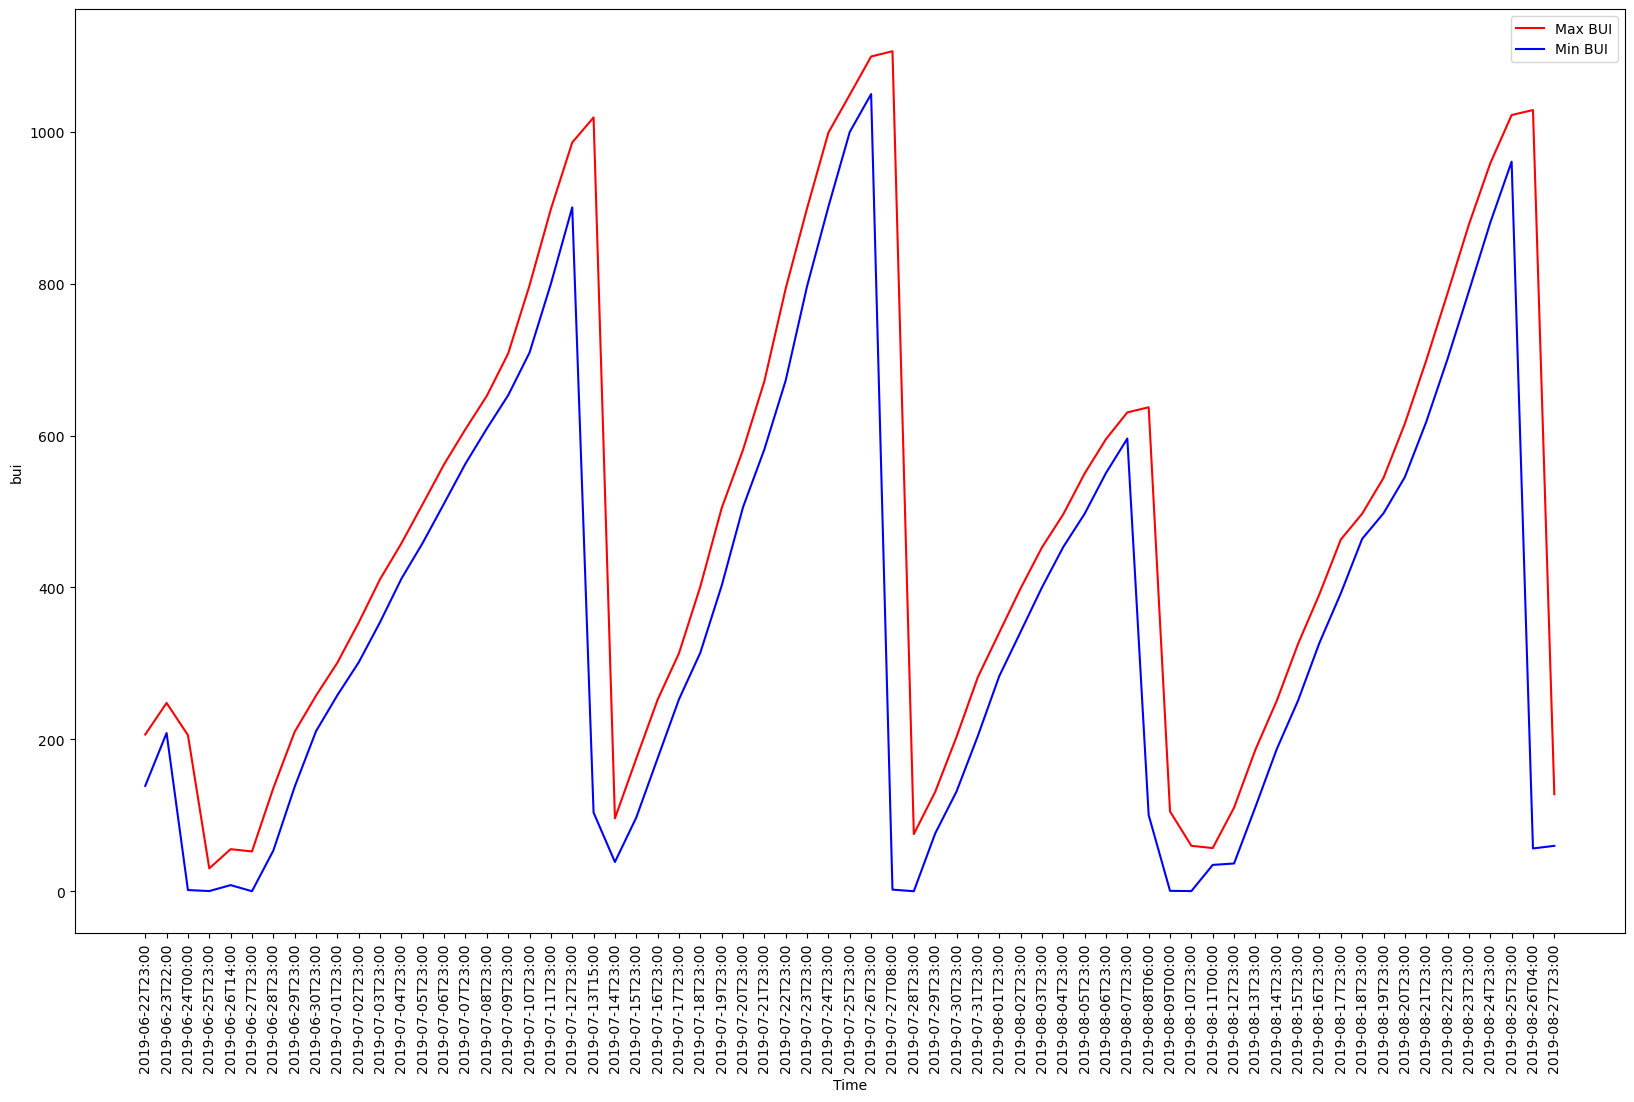

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pdtotal = pd.read_csv('Samples/2019/2019byHourFWIXFFMCFireHour.csv')


#fwix,ffmc,dmc,dc,isi,bui

fields = ['fwix', 'ffmc', 'dmc', 'dc', 'isi', 'bui']
for i in fields:

    var = i.upper()
    var_field = i

    chunk_size = 24
    num_chunks = len(pdtotal) // chunk_size + 1
    print(num_chunks)

    bar_width = 0.25
    index = np.arange(num_chunks)

    max_times = []
    max_fwix = []
    min_fwix = []

    print(num_chunks)

    for i in range(num_chunks):
        chunk = pdtotal[i*chunk_size:(i+1)*chunk_size]
        if chunk.empty:
            continue
        
        min_index = chunk[f'{var_field}'].idxmin()
        max_index = chunk[f'{var_field}'].idxmax()

        max_time = chunk.loc[max_index, 'hourly.time']
        max_fwi = chunk.loc[max_index, f'{var_field}']
        max_times.append(max_time)
        max_fwix.append(max_fwi)
        min_fwi = chunk.loc[min_index, f'{var_field}']
        min_fwix.append(min_fwi)



    plt.figure(figsize=(20,12))
    plt.plot(max_times, max_fwix, label=f'Max {var}', color='red')
    plt.plot(max_times, min_fwix, label=f'Min {var}', color='blue')
    plt.xlabel('Time')
    plt.xticks(max_times, rotation=90)
    plt.ylabel(f'{var_field}')
    plt.legend()
    plt.savefig(f'{var}_maxMin.png', dpi=300, bbox_inches='tight')
    plt.show()

68
68
67 67


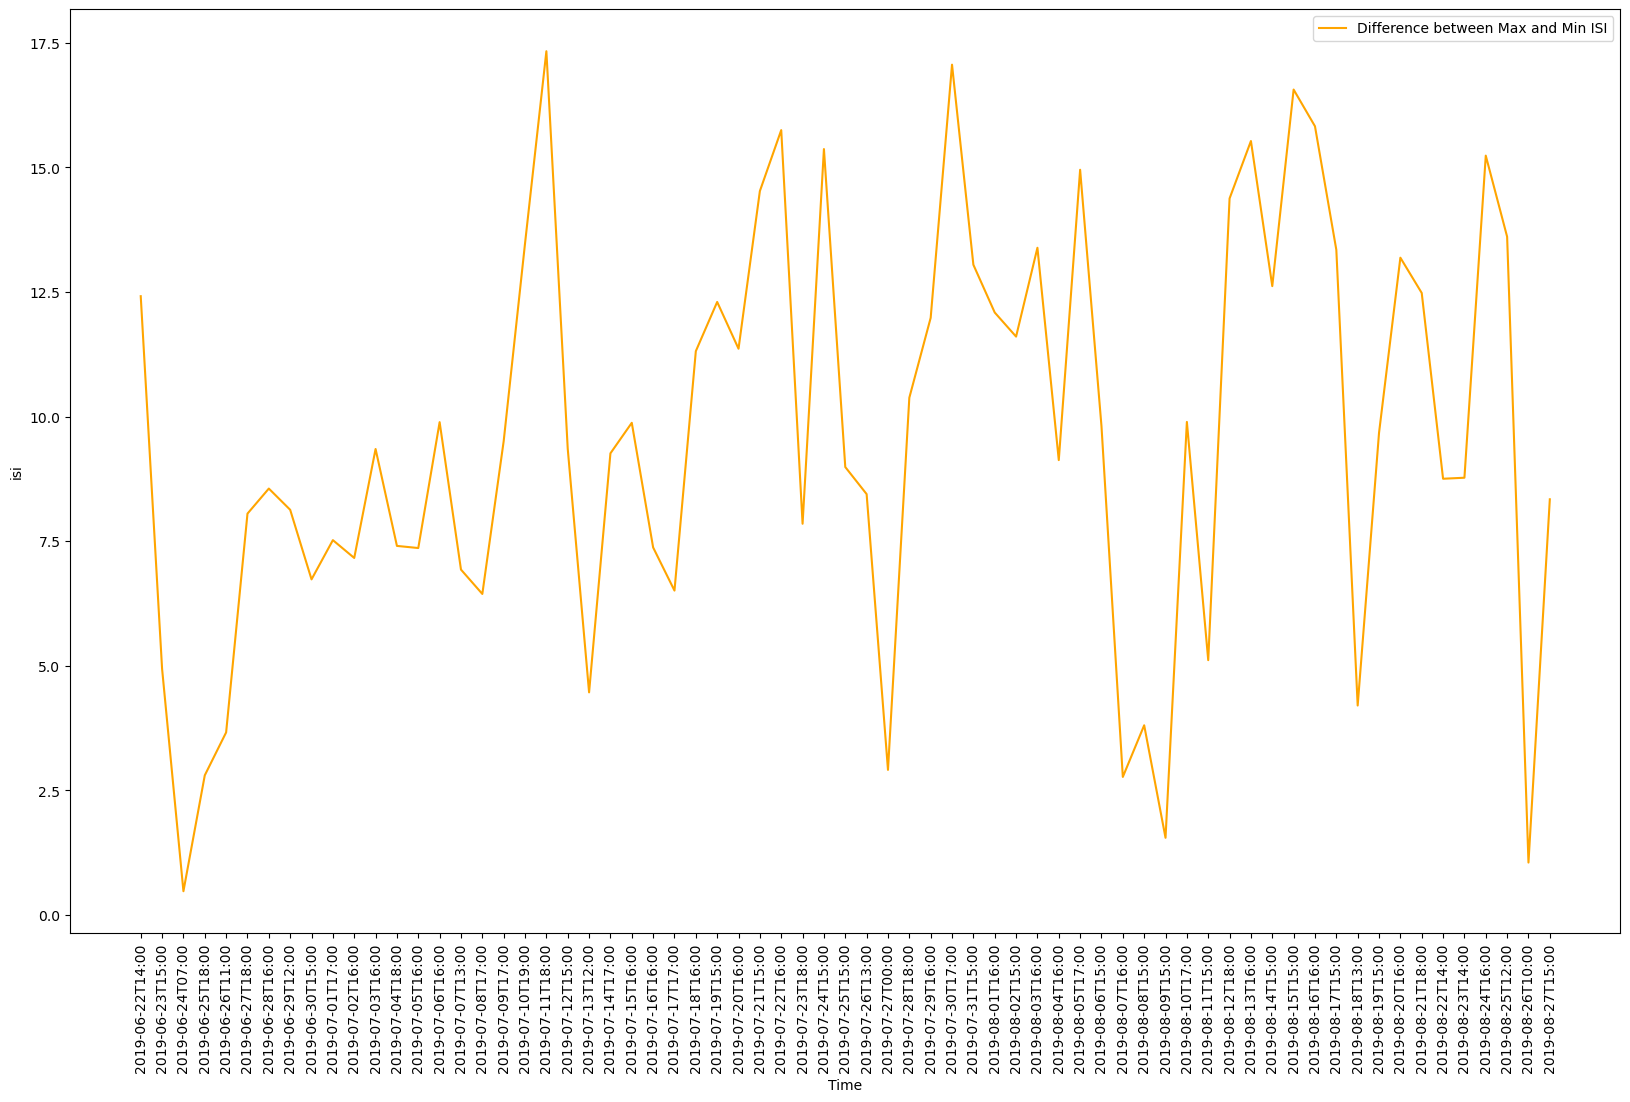

In [14]:
pdtotal = pd.read_csv('Samples/2019/2019byHourFWIXFFMCFireHour.csv')


#fwix,ffmc,dmc,dc,isi,bui

var = "ISI"
var_field = "isi"

chunk_size = 24
num_chunks = len(pdtotal) // chunk_size + 1
print(num_chunks)

bar_width = 0.25
index = np.arange(num_chunks)

max_times = []
diffs = []

print(num_chunks)

for i in range(num_chunks):
    chunk = pdtotal[i*chunk_size:(i+1)*chunk_size]
    if chunk.empty:
        continue
    
    min_index = chunk[f'{var_field}'].idxmin()
    max_index = chunk[f'{var_field}'].idxmax()
    

    max_time = chunk.loc[max_index, 'hourly.time']
    max_fwi = chunk.loc[max_index, f'{var_field}']
    min_fwi = chunk.loc[min_index, f'{var_field}']

    max_times.append(max_time)
    diff = max_fwi - min_fwi
    diffs.append(diff)

    

print(len(max_times), len(diffs))

plt.figure(figsize=(20,12))
plt.plot(max_times, diffs, label=f'Difference between Max and Min {var}', color='orange')
plt.xlabel('Time')
plt.xticks(max_times, rotation=90)
plt.ylabel(f'{var_field}')
plt.legend()
plt.savefig(f'{var}_DIFFmaxMin_graph.png', dpi=300, bbox_inches='tight')
plt.show()

15
15
14 14


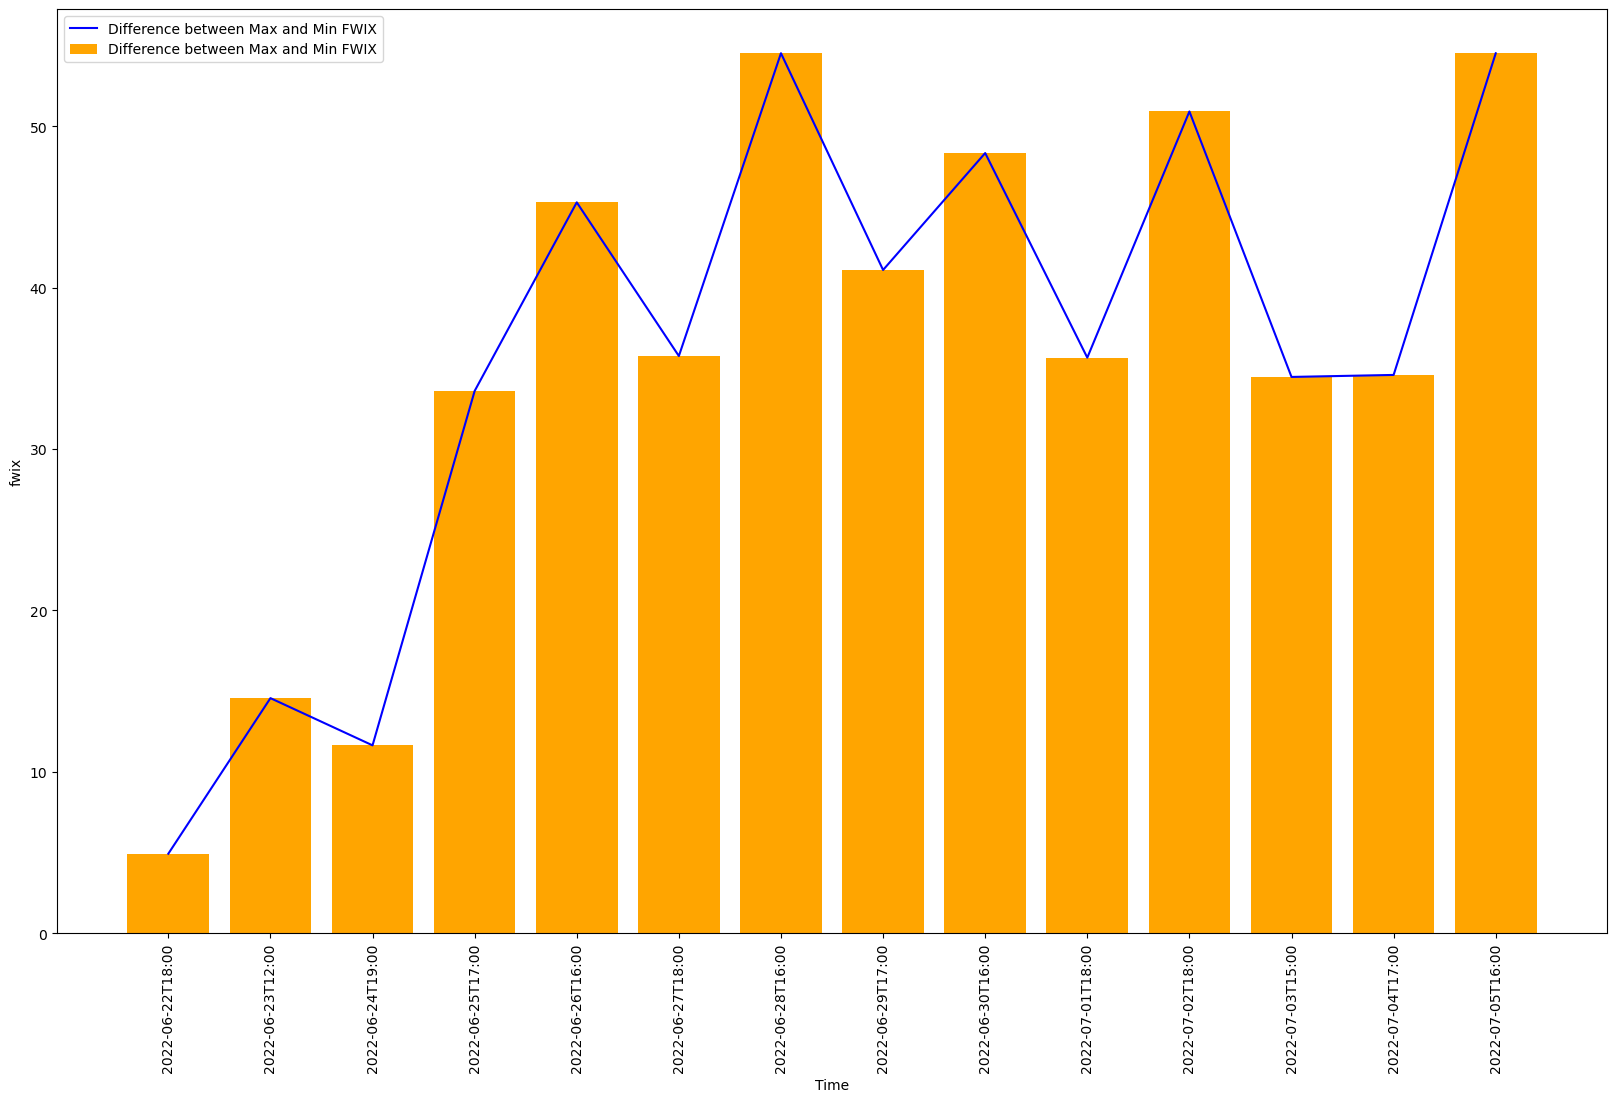

15
15
14 14


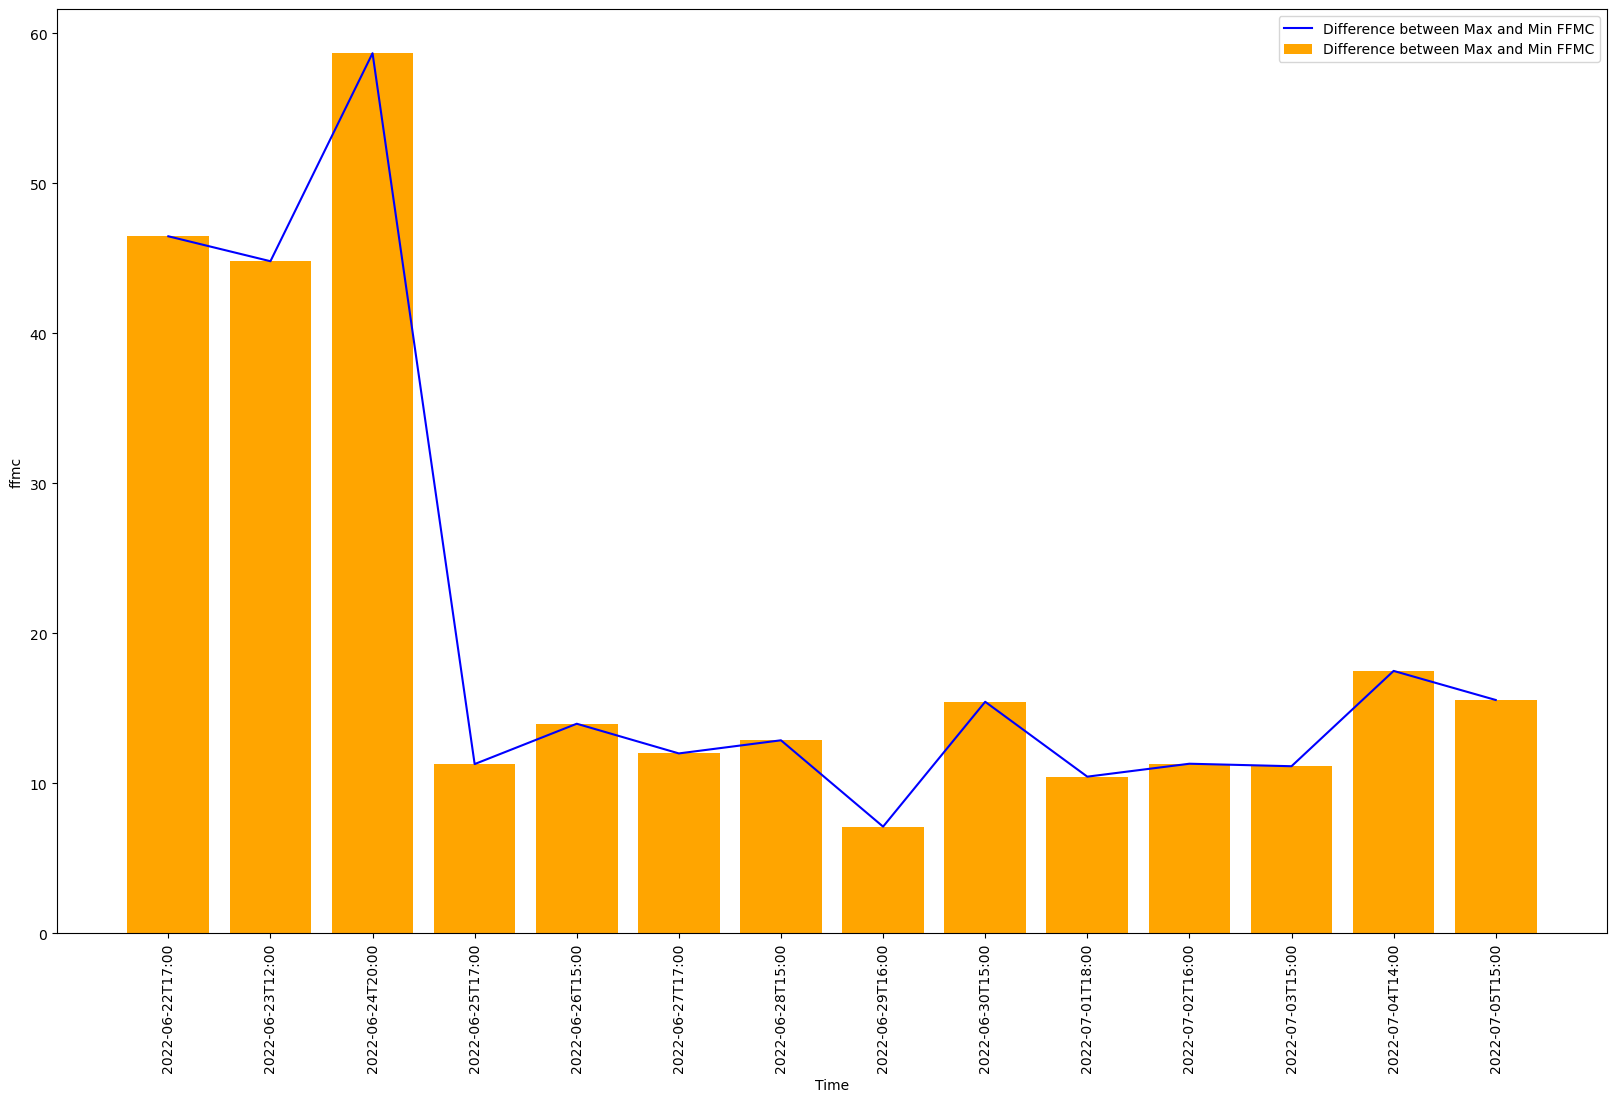

15
15
14 14


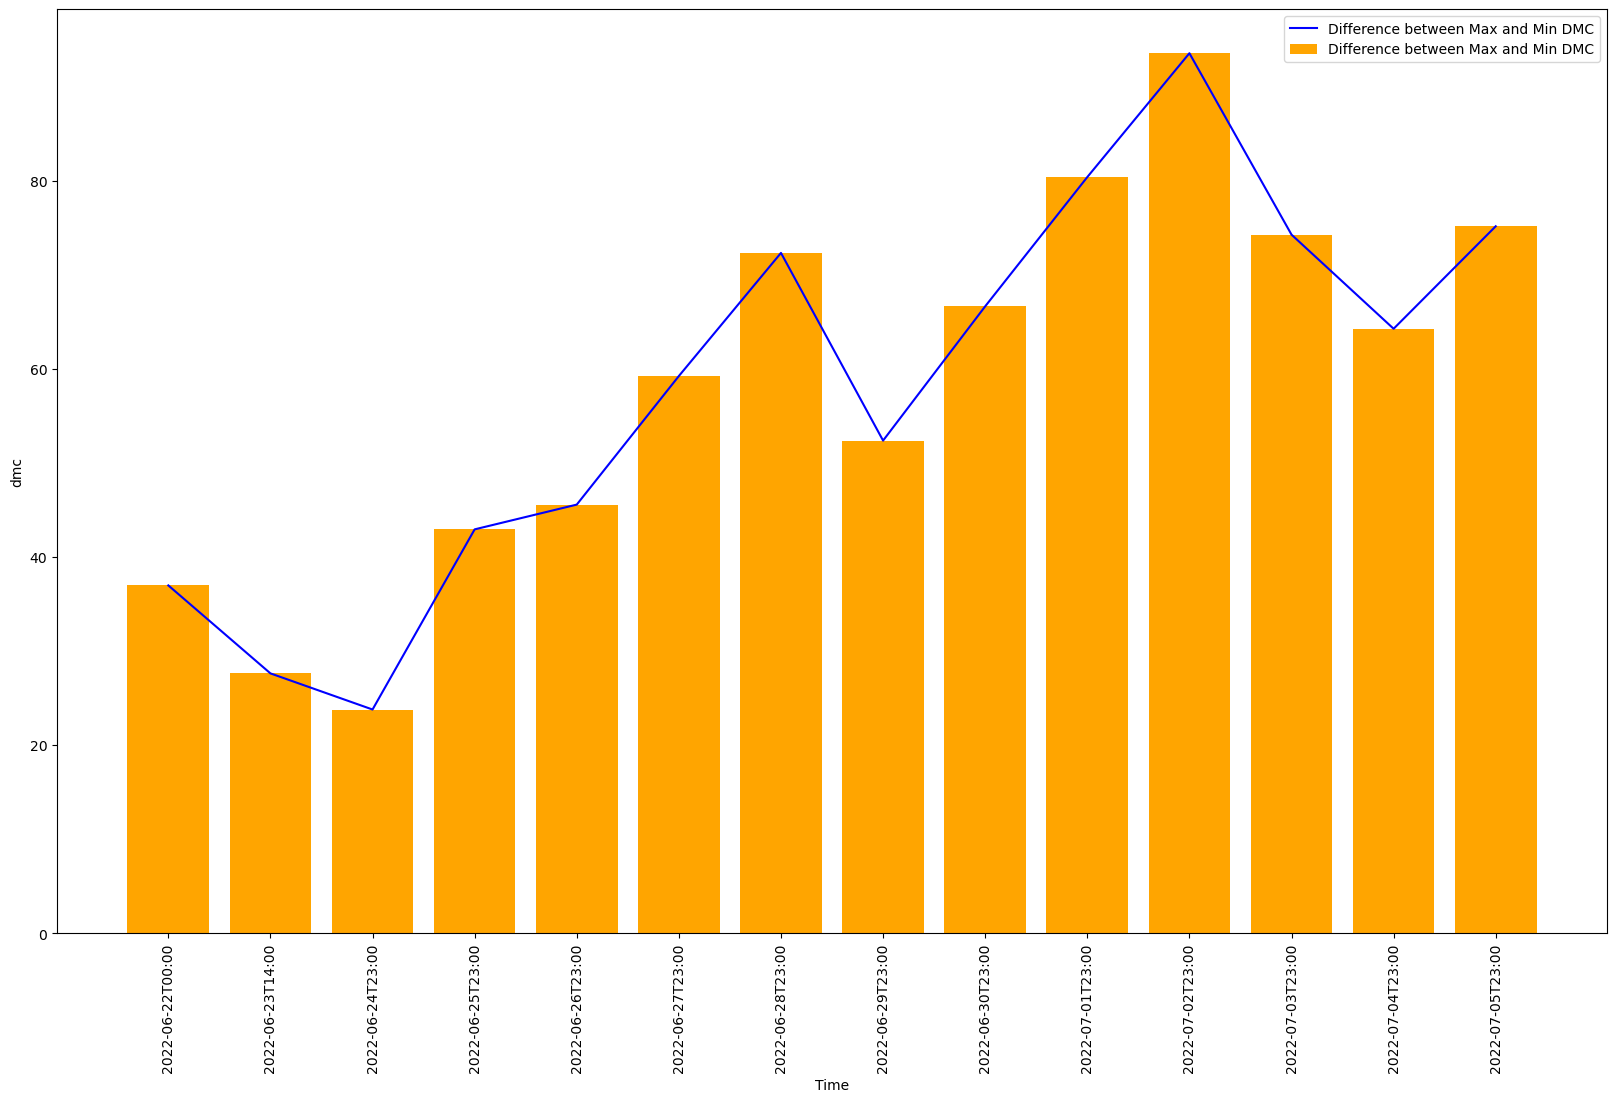

15
15
14 14


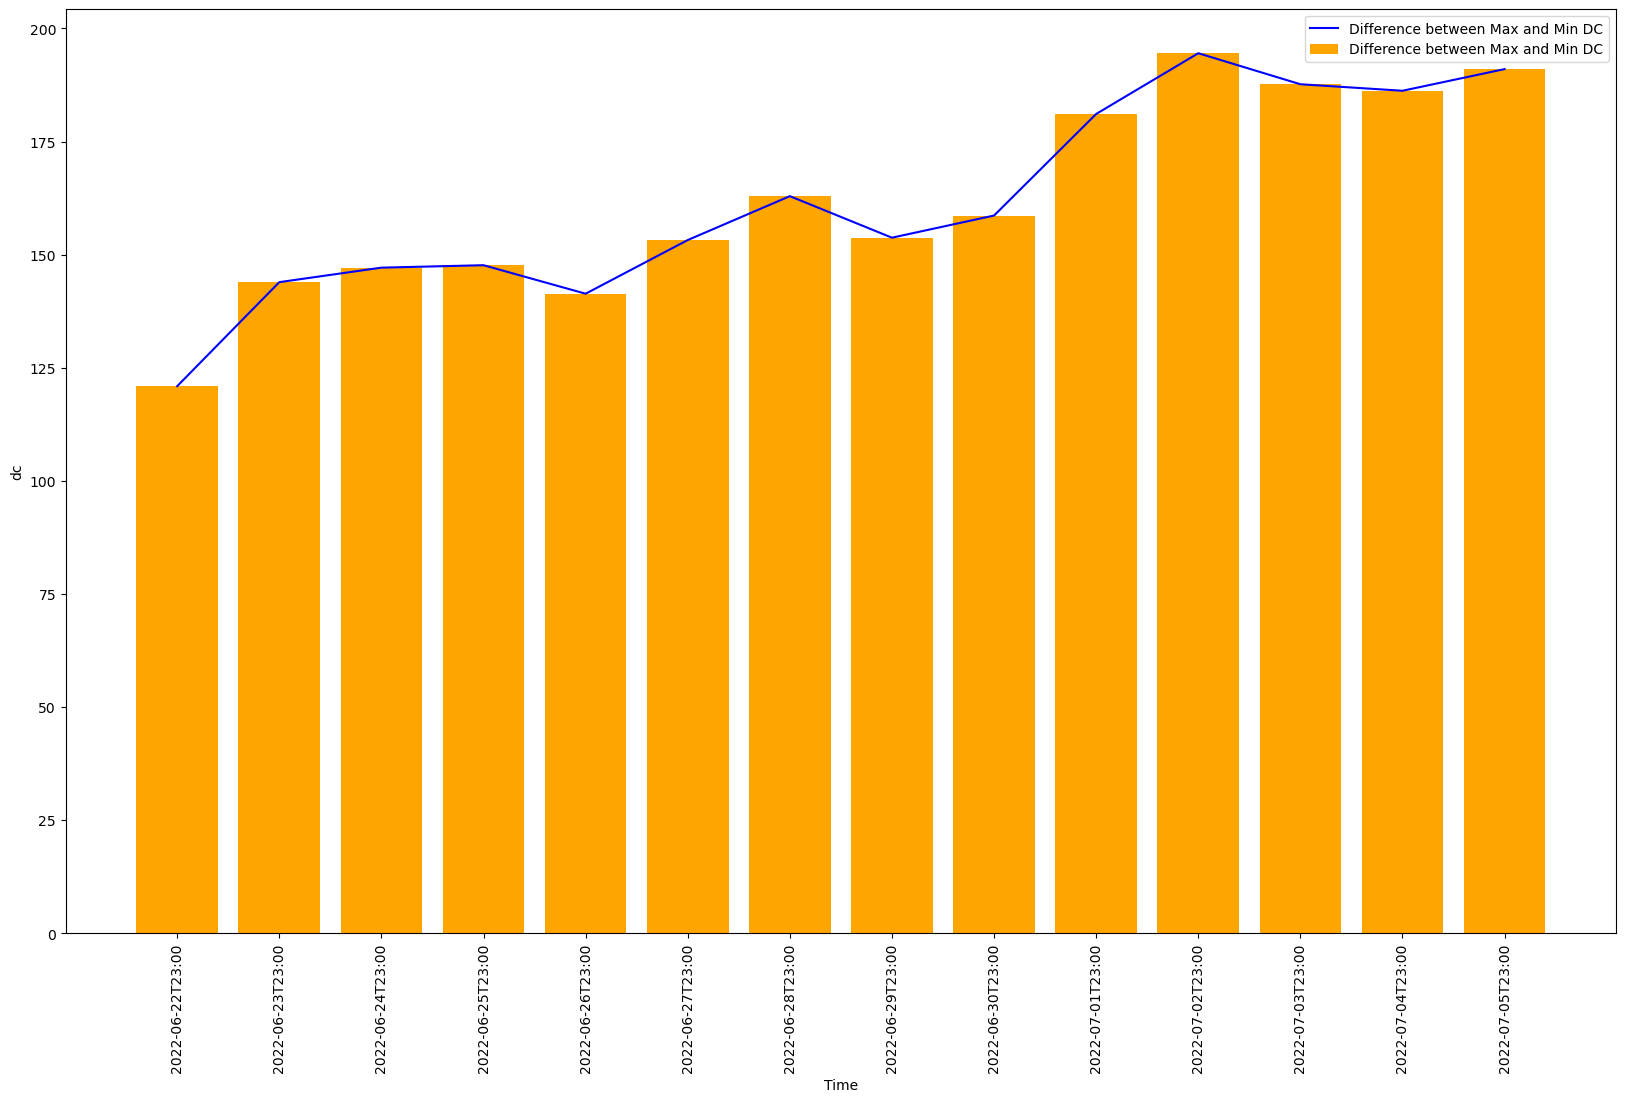

15
15
14 14


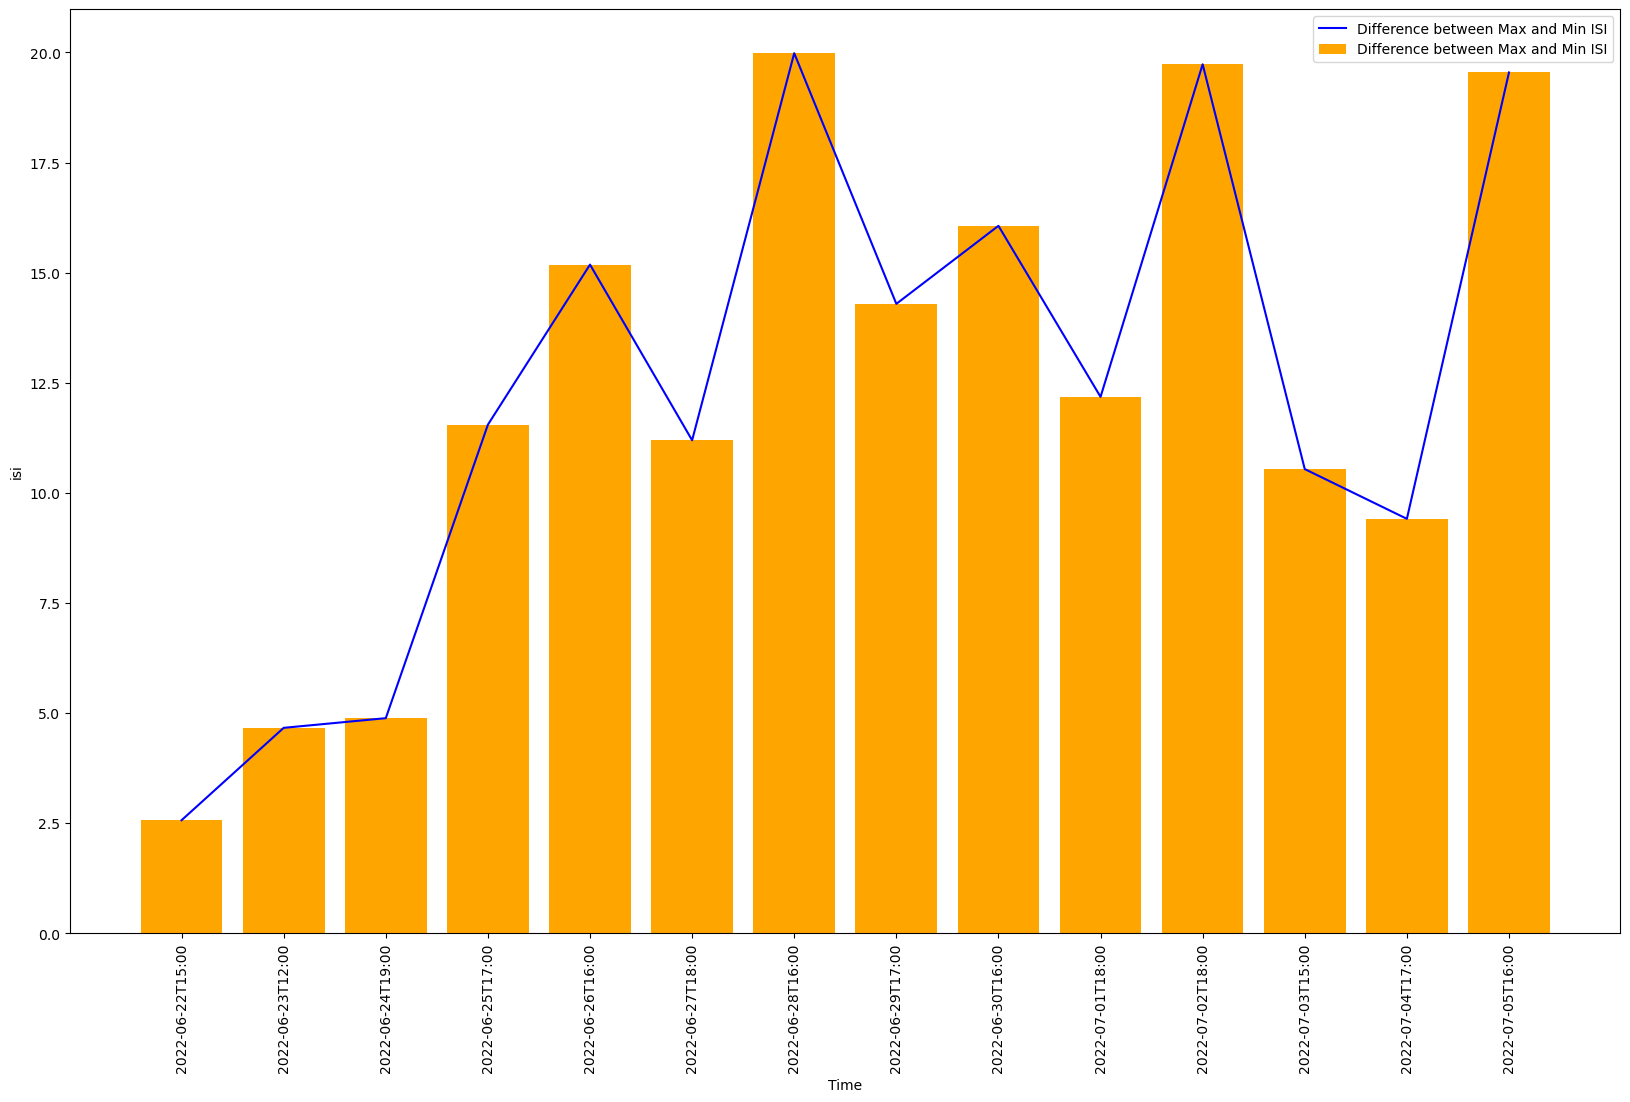

15
15
14 14


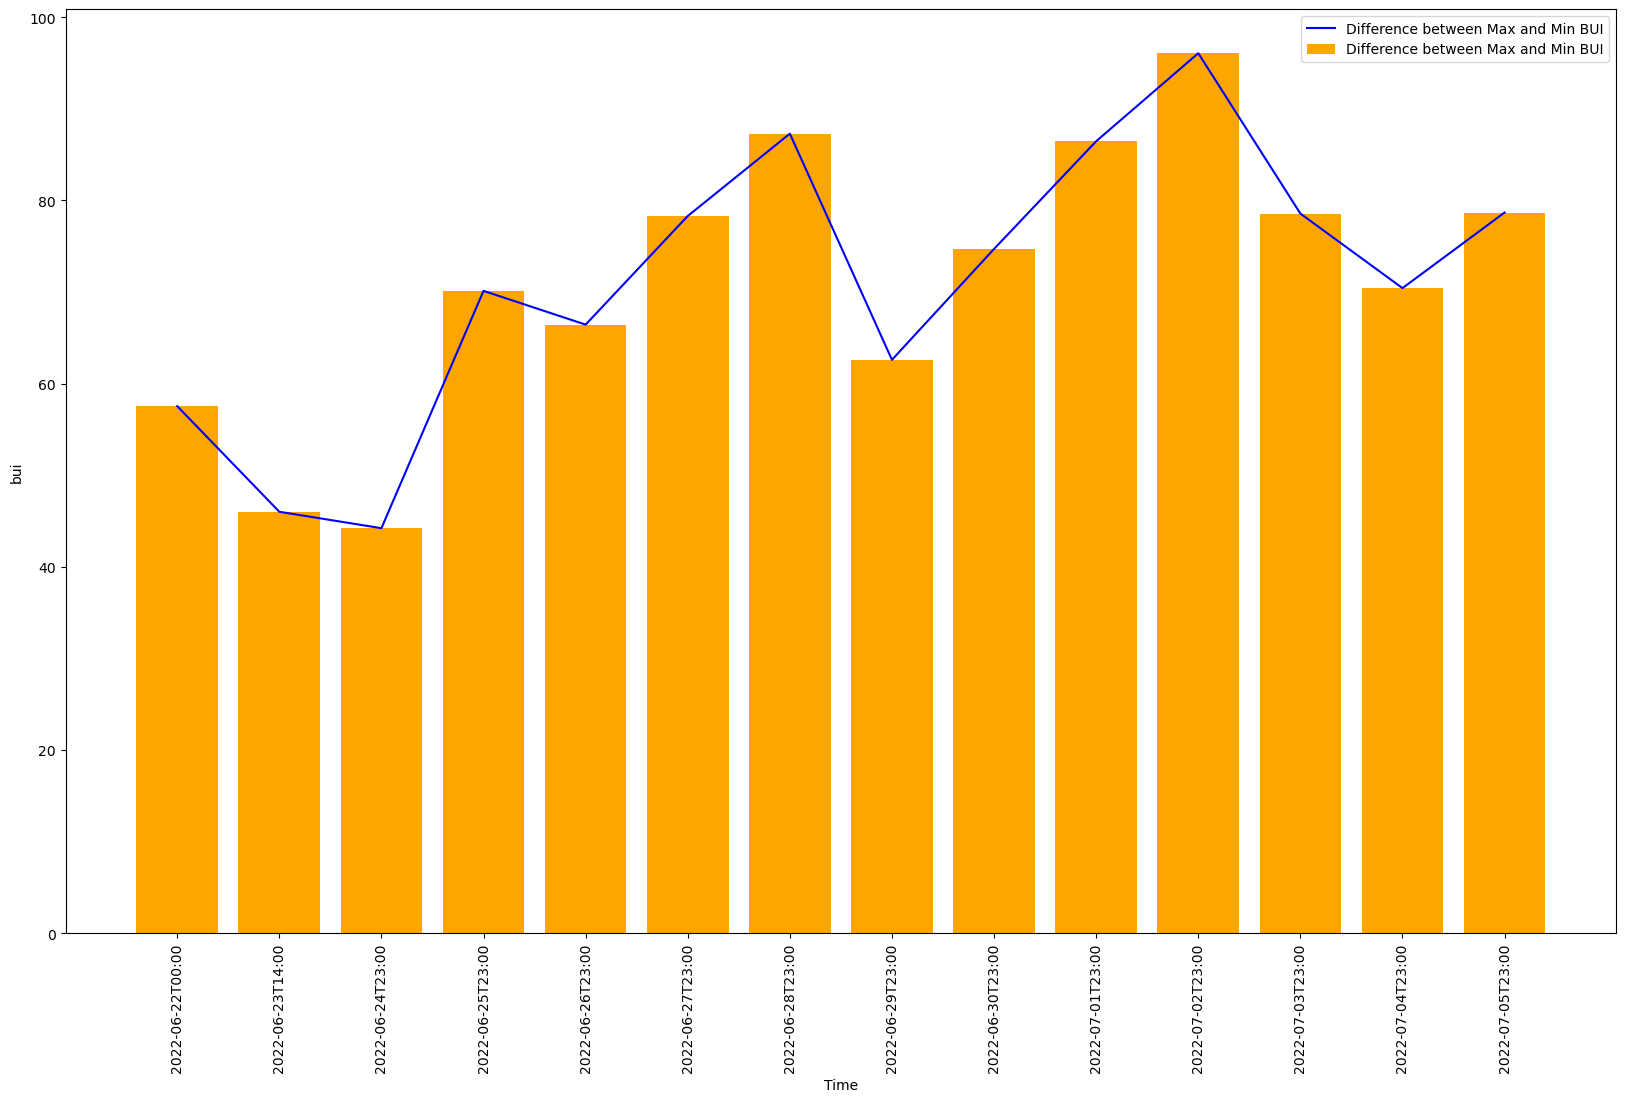

In [28]:
pdtotal = pd.read_csv('Samples/2022/2022byHourFWIXFFMCFireHour.csv')


#fwix,ffmc,dmc,dc,isi,bui

fields = ['fwix', 'ffmc', 'dmc', 'dc', 'isi', 'bui']
for i in fields:

    var = i.upper()
    var_field = i

    chunk_size = 24
    num_chunks = len(pdtotal) // chunk_size + 1
    print(num_chunks)

    bar_width = 0.25
    index = np.arange(num_chunks)

    max_times = []
    diffs = []

    print(num_chunks)

    for i in range(num_chunks):
        chunk = pdtotal[i*chunk_size:(i+1)*chunk_size]
        if chunk.empty:
            continue
        
        min_index = chunk[f'{var_field}'].idxmin()
        max_index = chunk[f'{var_field}'].idxmax()
        

        max_time = chunk.loc[max_index, 'hourly.time']
        max_fwi = chunk.loc[max_index, f'{var_field}']
        min_fwi = chunk.loc[min_index, f'{var_field}']

        max_times.append(max_time)
        diff = max_fwi - min_fwi
        diffs.append(diff)

        

    print(len(max_times), len(diffs))

    plt.figure(figsize=(20,12))
    plt.bar(max_times, diffs, label=f'Difference between Max and Min {var}', color='orange')
    plt.plot(max_times, diffs, label=f'Difference between Max and Min {var}', color='blue')
    plt.xlabel('Time')
    plt.xticks(max_times, rotation=90)
    plt.ylabel(f'{var_field}')
    plt.legend()
    plt.savefig(f'{var}_DIFFmaxMin.png', dpi=300, bbox_inches='tight')
    plt.show()